# Uyku, Kahve ve Motivasyon: Günlük Hayatımın Datası

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\emekt\OneDrive\Desktop\Mini_Dataset.xlsx"

df = pd.read_excel(file_path)


In [6]:
df.head(7)

,Tarih,Uyku (saat),Kahve (adet),Ders/Çalışma (saat),Kitap Okuma (dk),Ekran Süresi (dk),Ruh Hali (1-5),Enerji Seviyesi (1-5),Motivasyon (1-5),Adım (bin),Su Miktarı
0,2025-08-29,6,0,3,45,3,3,3,4,1500,3
1,2025-08-30,7,1,3,60,3,5,4,5,7000,3
2,2025-08-31,5,0,2,0,2,2,3,3,7664,2
3,2025-09-01,6,0,5,30,5,4,4,5,6500,2
4,2025-09-02,5,1,5,40,5,4,4,5,4000,3
5,2025-09-03,6,2,4,35,4,4,4,4,5333,3
6,2025-09-04,6,0,4,35,4,4,4,4,3200,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tarih                  7 non-null      datetime64[ns]
 1   Uyku (saat)            7 non-null      int64         
 2   Kahve (adet)           7 non-null      int64         
 3   Ders/Çalışma (saat)    7 non-null      int64         
 4   Kitap Okuma (dk)       7 non-null      int64         
 5   Ekran Süresi (dk)      7 non-null      int64         
 6   Ruh Hali (1-5)         7 non-null      int64         
 7   Enerji Seviyesi (1-5)  7 non-null      int64         
 8   Motivasyon (1-5)       7 non-null      int64         
 9   Adım (bin)             7 non-null      int64         
 10  Su Miktarı             7 non-null      int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 748.0 bytes


## TİP DÖNÜŞÜMLERİ YAPIYORUM

In [9]:
numeric_cols=[ "Uyku (saat)", "Kahve (adet)", "Ders/Çalışma (saat)", "Kitap Okuma (dk)",
    "Ekran Süresi (dk)", "Ruh Hali (1-5)", "Enerji Seviyesi (1-5)",
    "Motivasyon (1-5)", "Adım (bin)", "Su Miktarı"]
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors="coerce")

df=df.sort_values("Tarih").reset_index(drop=True)

## RUTİNLERİMİ ÖZETLEMEK İÇİN TANIMLAYICI İSTATİSTİKLER YAPIYORUM

In [12]:
summary = {
    "Başlangıç": df["Tarih"].min().date(),
    "Bitiş": df["Tarih"].max().date(),
    "Gün Sayısı": df["Tarih"].nunique(),
    "Ortalama Uyku (saat)": round(df["Uyku (saat)"].mean(), 2),
    "Toplam Kitap (dk)": int(df["Kitap Okuma (dk)"].sum()),
    "Ortalama Kahve (adet)": round(df["Kahve (adet)"].mean(), 2),
    "Ortalama Ekran (dk)": round(df["Ekran Süresi (dk)"].mean(), 1),
    "Ortalama Motivasyon": round(df["Motivasyon (1-5)"].mean(), 2),
}
summary


{'Başlangıç': datetime.date(2025, 8, 29),
 'Bitiş': datetime.date(2025, 9, 4),
 'Gün Sayısı': 7,
 'Ortalama Uyku (saat)': np.float64(5.86),
 'Toplam Kitap (dk)': 245,
 'Ortalama Kahve (adet)': np.float64(0.57),
 'Ortalama Ekran (dk)': np.float64(3.7),
 'Ortalama Motivasyon': np.float64(4.29)}

#### Rutinlerimin Tanımlayıcı İstatistikleri

29 Ağustos 2025 ile 4 Eylül 2025 tarihleri arasında tuttuğum rutin verilerimden çıkan özet tablo:

- **Gün Sayısı:** 7 gün  
- **Ortalama Uyku:** 5.9 saat  
- **Toplam Kitap Okuma:** 245 dakika  
- **Ortalama Kahve Tüketimi:** 0.6 fincan/gün  
- **Ortalama Ekran Süresi:** 3.7 saat/gün  
- **Ortalama Motivasyon:** 4.3 / 5  

####  Yorumlarım
- Ortalama 6 saate yakın uyuyorum; uyku düzenim fena değil ama biraz daha artırabilirim.  
- Bir haftada 245 dakika kitap okumuşum; bu da günde ortalama ~35 dakikaya denk geliyor.  
- Kahveyi oldukça az tüketmişim, neredeyse yarım fincan/gün.  
- Ekran sürem günlük 3.5–4 saat civarında; aslında bu süreyi biraz daha kısaltmak mümkün.  
- Motivasyon seviyem yüksek çıkmış (ortalama 4.3); bu da genel olarak enerjimin iyi olduğunu gösteriyor.  

Bu özet bana hem alışkanlıklarımı sayılarla görme şansı verdi hem de hangi alanlarda gelişim gösterebileceğimi işaret etti.


##  Küçük İçgörüler: Günlüklerimden Çıkan İlginç Noktalar


In [14]:
def pick_day(df,col,how="max"):
    idx=df[col].idxmax() if how=="max" else df[col].idxmin()
    row=df.loc[idx]
    return row["Tarih"].date(), row[col]

rapor={}

In [15]:
# En uzun / kısa uyku günü
rapor["En uzun uyku"] = pick_day(df, "Uyku (saat)", "max")
rapor["En kısa uyku"] = pick_day(df, "Uyku (saat)", "min")

In [16]:
# En yüksek motivasyon günü
rapor["En yüksek motivasyon"] = pick_day(df, "Motivasyon (1-5)", "max")

In [17]:
# En çok kitap okunan gün
rapor["En çok kitap"] = pick_day(df, "Kitap Okuma (dk)", "max")

In [18]:
rapor

{'En uzun uyku': (datetime.date(2025, 8, 30), np.int64(7)),
 'En kısa uyku': (datetime.date(2025, 8, 31), np.int64(5)),
 'En yüksek motivasyon': (datetime.date(2025, 8, 30), np.int64(5)),
 'En çok kitap': (datetime.date(2025, 8, 30), np.int64(60))}

#### Günlüklerimden Çıkan İlginç Noktalar

Verilerimden dikkat çeken bazı noktalar:

- **En uzun uyku:** 30 Ağustos’ta 7 saat uyumuşum.  
- **En kısa uyku:** 31 Ağustos’ta sadece 5 saat uyumuşum.  
- **En yüksek motivasyon:** 30 Ağustos günü motivasyonum 5/5 çıkmış.  
- **En çok kitap okuma:** 30 Ağustos’ta 60 dakika kitap okumuşum.  

####  Yorumlarım
- 30 Ağustos günü hem en uzun uyumuşum, hem en yüksek motivasyona ulaşmışım, hem de en çok kitap okumuşum.  
   Bu günün benim için oldukça verimli geçtiği çok net görünüyor.  
- 31 Ağustos günü ise en kısa uykumu almışım (5 saat); bu da motivasyonumun görece düşük olmasını açıklıyor olabilir.  

Bu küçük içgörüler bana, **uyku – motivasyon – üretkenlik** arasındaki ilişkiyi kendi verimle gözlemleme şansı veriyor.


## RUTİNLERİMİ GRAFİKLERLE GÖRSELLEŞTİRİYORUM

In [21]:
import os, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates
os.makedirs("figs", exist_ok=True)

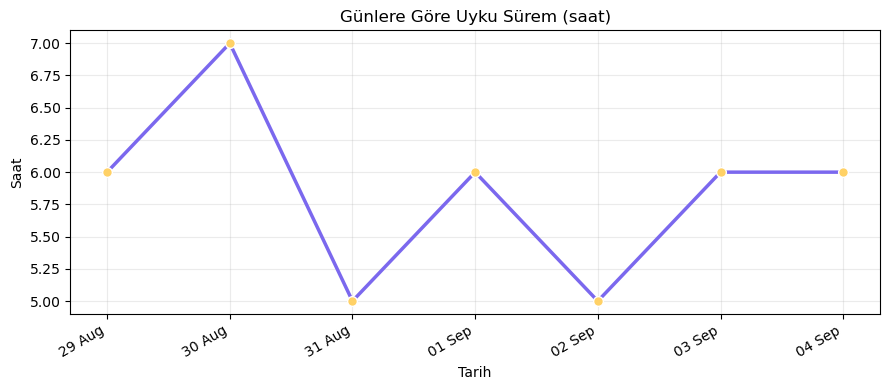

In [22]:
# UYKU
plt.figure(figsize=(9,4))
plt.plot(
    df["Tarih"], df["Uyku (saat)"],
    color="#7B68EE", linewidth=2.5,
    marker="o", markersize=7,
    markerfacecolor="#FFD166", markeredgecolor="white", markeredgewidth=1
)
plt.title("Günlere Göre Uyku Sürem (saat)")
plt.xlabel("Tarih"); plt.ylabel("Saat")
plt.grid(alpha=0.25)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
plt.gcf().autofmt_xdate()
plt.tight_layout(); plt.savefig("figs/01_uyku_trendi.png", dpi=200)
plt.show()


####  Genel olarak uyku düzenim 5–7 saat aralığında dalgalanıyor, ama 30 Ağustos öne çıkan en dinlenmiş günüm. 

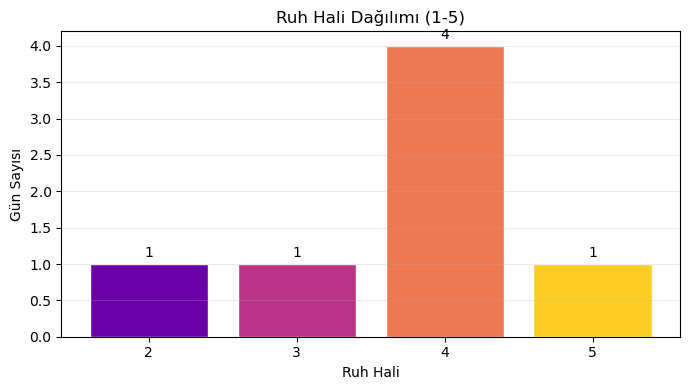

In [24]:
# RUH HALİ
ruh_counts=df["Ruh Hali (1-5)"].value_counts().sort_index()

plt.figure(figsize=(7,4))
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(ruh_counts)))
bars = plt.bar(ruh_counts.index.astype(str), ruh_counts.values, color=colors, edgecolor="white", linewidth=1)


for b in bars:
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.05, str(int(b.get_height())),
             ha="center", va="bottom", fontsize=10)

plt.title("Ruh Hali Dağılımı (1-5)")
plt.xlabel("Ruh Hali"); plt.ylabel("Gün Sayısı")
plt.grid(axis="y", alpha=0.25)
plt.tight_layout(); plt.savefig("figs/02_ruh_hali_dagilim.png", dpi=200)
plt.show()

#### Ruh Hali Dağılımı

- 7 günün 4’ünde ruh halim **4** seviyesinde olmuş → genel olarak oldukça pozitif bir hafta.  
- Sadece 1 gün **2** seviyesine kadar düşmüş; düşük ruh hali nadir.  
- 1 gün **3**, 1 gün de **5** seviyesinde.  

Çoğunlukla dengeli ve iyi hissettiğim günler yaşamışım; moralim genelde yüksek.


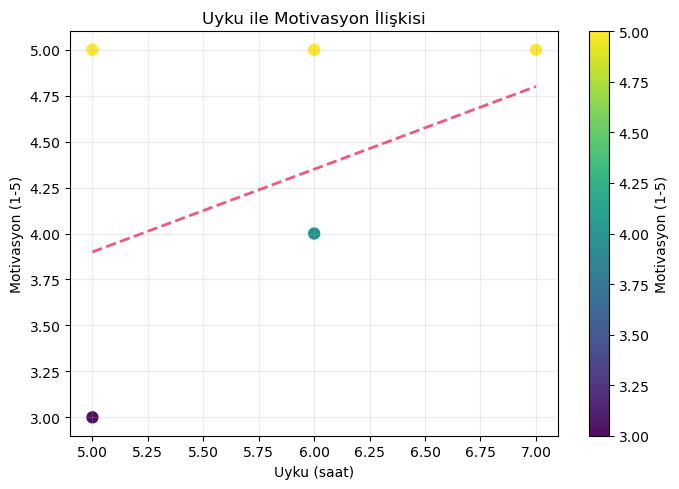

In [25]:
# UYKU VE MOTİVASYON İLİŞKİSİ 
x = df["Uyku (saat)"].values
y = df["Motivasyon (1-5)"].values

plt.figure(figsize=(7,5))
sc = plt.scatter(
    x, y,
    c=y, cmap="viridis",  # motivasyona göre renk
    s=90, alpha=0.95,
    edgecolor="white", linewidth=0.6
)
plt.colorbar(sc, label="Motivasyon (1-5)")

# Basit trend çizgisi (lineer)
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m*x_line + b, linestyle="--", linewidth=2, color="#EF476F", alpha=0.9)

plt.title("Uyku ile Motivasyon İlişkisi")
plt.xlabel("Uyku (saat)"); plt.ylabel("Motivasyon (1-5)")
plt.grid(alpha=0.25)
plt.tight_layout(); plt.savefig("figs/03_uyku_motivasyon_scatter.png", dpi=200)
plt.show()


#### Uyku ile Motivasyon İlişkisi

- Uyku süresi arttıkça motivasyonumda da genel olarak yükselme eğilimi var.  
- 5 saat uyuduğum günlerde motivasyonum **3** seviyesine kadar düşmüş.  
- 6–7 saat uyuduğum günlerde ise motivasyonum çoğunlukla **5** seviyesine çıkmış.  

Bu grafik bana yeterince uyuduğumda motivasyonumun da belirgin şekilde arttığını gösteriyor.


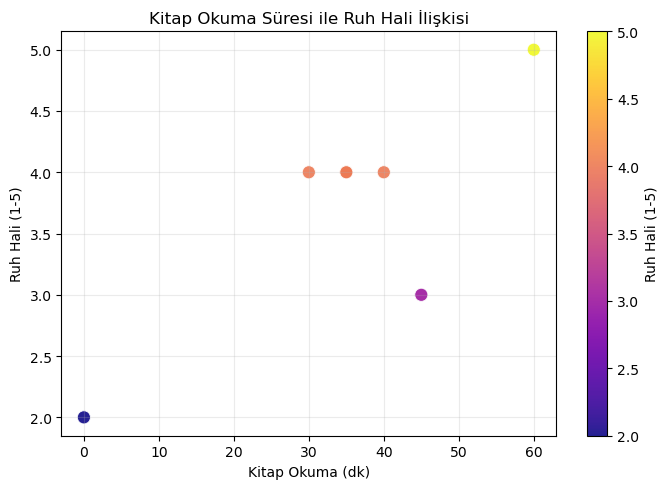

In [27]:
## KİTAP OKUMA - RUH HALİ İLİŞKİSİ
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sc = plt.scatter(
    df["Kitap Okuma (dk)"], df["Ruh Hali (1-5)"],
    c=df["Ruh Hali (1-5)"], cmap="plasma",
    s=90, alpha=0.9, edgecolor="white", linewidth=0.7
)
plt.colorbar(sc, label="Ruh Hali (1-5)")

plt.title("Kitap Okuma Süresi ile Ruh Hali İlişkisi")
plt.xlabel("Kitap Okuma (dk)")
plt.ylabel("Ruh Hali (1-5)")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


#### Kitap Okuma ile Ruh Hali İlişkisi

- Kitap okumadığım günlerde ruh halim **2** seviyesine kadar düşmüş.  
- 30–40 dakika kitap okuduğum günlerde ruh halim genelde **4** seviyesinde.  
- 60 dakika kitap okuduğum gün ise ruh halim **5** ile en yüksek seviyeye çıkmış.  

Bu grafik bana kitap okudukça ruh halimin daha pozitif olduğunu ve okumanın psikolojik açıdan bana iyi geldiğini gösteriyor.
